# Chapter 2: Mechanism Design - The Art of Letting People Be Selfish

In Chapter 1, we saw how selfish behavior causes traffic jams. In this chapter, we ask the reverse question: **Can we design a system where selfish behavior actually leads to the best possible outcome?**

This field is called **Mechanism Design** (often called "Reverse Game Theory"). Instead of analyzing a game, we *build* the game rules so that players, acting in their own self-interest, unintentionally solve a problem for us.

## The Problem: Selling a Single Item
Imagine you are selling a slightly used smartphone. You have $n$ potential buyers.
* Each buyer has a **private valuation** ($v_i$): the maximum amount they are willing to pay. You don't know this number.
* You want to give the phone to the person who values it the most (this is called **Maximizing Social Surplus**).

How do you get them to tell you their true value? If you just ask "How much will you pay?", they might lie to get a better deal.

## Attempt 1: The First-Price Auction
This is the most intuitive format.
1.  Everyone writes a bid in a sealed envelope.
2.  Highest bid wins.
3.  **Winner pays their bid.**

**The Flaw:** If you value the phone at \$100, you would *never* bid \$100. If you did, your profit (utility) would be \$0. You are incentivized to **shade your bid** (e.g., bid \$80 to try and make \$20 profit).
* This makes the game complex. Everyone is guessing what everyone else is guessing.

## Attempt 2: The Vickrey Auction (Second-Price)
This is the "magic" solution used in modern economics (and variations of it are used by eBay and Google Ads).
1.  Everyone writes a bid in a sealed envelope.
2.  Highest bid wins.
3.  **Winner pays the *Second-Highest* price.**

**The Claim:** In a Second-Price auction, your best strategy is to **tell the exact truth**, no matter what anyone else does.

Let's prove this with a simulation.

--- TRUE VALUATIONS (Private) ---
Alice: $100
Bob: $80
Charlie: $60
Dave: $90
Eve: $40
------------------------------

[Scenario 1: First-Price Auction]
Bids (Strategic): [80.0, 64.0, 48.0, 72.0, 32.0]
Winner: Alice
Payment: $80.00
Winner's Profit (Utility): $20.00

[Scenario 2: Second-Price Auction]
Bids (Truthful): [100, 80, 60, 90, 40]
Winner: Alice
Payment: $90.00 (This is the 2nd highest bid!)
Winner's Profit (Utility): $10.00


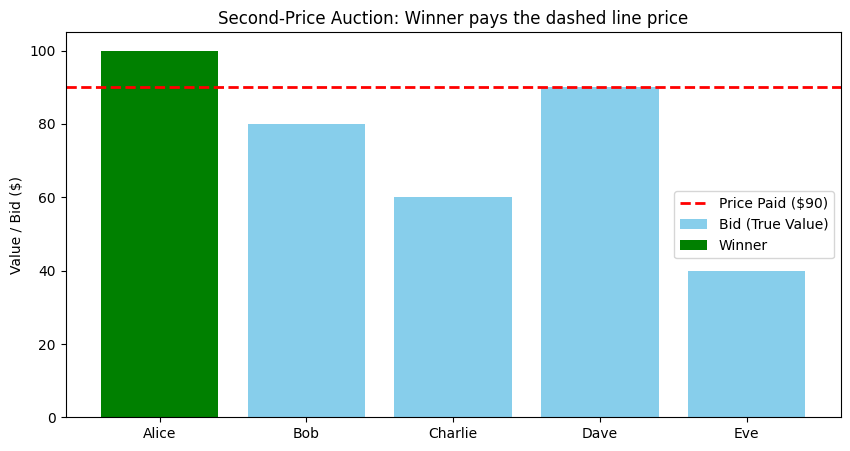

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def run_auction(bidders, valuations, bids, auction_type='second_price'):
    """
    Simulates a single-item auction.
    bidders: List of names
    valuations: List of true values (v_i)
    bids: List of actual bids submitted (b_i)
    auction_type: 'first_price' or 'second_price'
    """
    
    # 1. Find the Winner (Highest Bid)
    # We use np.argmax to find the index of the highest bid
    winner_idx = np.argmax(bids)
    winner_name = bidders[winner_idx]
    winning_bid = bids[winner_idx]
    
    # 2. Determine Payment
    if auction_type == 'first_price':
        payment = winning_bid
    elif auction_type == 'second_price':
        # Sort bids to find the second highest
        sorted_bids = sorted(bids, reverse=True)
        # The second highest is at index 1
        payment = sorted_bids[1]
        
    # 3. Calculate Utility (Profit)
    # Utility = True Value - Payment (if you win)
    # Utility = 0 (if you lose)
    winner_true_value = valuations[winner_idx]
    utility = winner_true_value - payment
    
    return winner_name, payment, utility

# --- SIMULATION ---

# Define 5 Bidders and their TRUE valuations (unknown to the seller)
names = ['Alice', 'Bob', 'Charlie', 'Dave', 'Eve']
true_values = [100, 80, 60, 90, 40]  # Alice wants it most ($100)

print(f"--- TRUE VALUATIONS (Private) ---")
for n, v in zip(names, true_values):
    print(f"{n}: ${v}")
print("-" * 30)

# SCENARIO 1: First-Price Auction (Strategic Bidding)
# Everyone lies! They bid 80% of their value to try and make a profit.
bids_first_price = [v * 0.8 for v in true_values] 

winner_1, pay_1, util_1 = run_auction(names, true_values, bids_first_price, 'first_price')

print(f"\n[Scenario 1: First-Price Auction]")
print(f"Bids (Strategic): {bids_first_price}")
print(f"Winner: {winner_1}")
print(f"Payment: ${pay_1:.2f}")
print(f"Winner's Profit (Utility): ${util_1:.2f}")

# SCENARIO 2: Vickrey (Second-Price) Auction (Truthful Bidding)
# Everyone tells the truth because the math says they should.
bids_second_price = true_values # Direct truth

winner_2, pay_2, util_2 = run_auction(names, true_values, bids_second_price, 'second_price')

print(f"\n[Scenario 2: Second-Price Auction]")
print(f"Bids (Truthful): {bids_second_price}")
print(f"Winner: {winner_2}")
print(f"Payment: ${pay_2:.2f} (This is the 2nd highest bid!)")
print(f"Winner's Profit (Utility): ${util_2:.2f}")

# --- VISUALIZATION ---
plt.figure(figsize=(10, 5))

# Plotting the Truthful/Second Price Scenario
bars = plt.bar(names, bids_second_price, color='skyblue', label='Bid (True Value)')

# Highlight the winner and the payment line
plt.bar(winner_2, bids_second_price[names.index(winner_2)], color='green', label='Winner')
plt.axhline(y=pay_2, color='red', linestyle='--', linewidth=2, label=f'Price Paid (${pay_2})')

plt.title("Second-Price Auction: Winner pays the dashed line price")
plt.ylabel("Value / Bid ($)")
plt.legend()
plt.show()

### What did we learn?

Look at the output of **Scenario 2** (Second-Price Auction).
1.  **Alice** had the highest value (\$100) and she won. This is **Socially Optimal**.
2.  Alice bid \$100, but she only paid **\$90** (Dave's bid).
3.  Alice made a profit of **\$10**.

**Why is telling the truth a Dominant Strategy?**
Suppose Alice tries to lie in a Second-Price Auction:
* **Case A (Underbid):** She bids \$85 instead of \$100.
    * She still wins (since \$85 > \$90 is false, wait... she would LOSE!).
    * If she bids \$85, Dave (bidding \$90) would win. Alice gets \$0 utility. **Lying hurt her.**
* **Case B (Overbid):** She bids \$150.
    * She still wins. She still pays the second highest price (\$90).
    * Her utility is exactly the same. **Lying didn't help.**

This leads us to the most important theorem in Mechanism Design:

> **Vickrey's Theorem:** In a second-price sealed-bid auction, truthful bidding is a dominant strategy. It guarantees the item goes to the person who values it most, and it is computationally easy to run.